# Calc Simple moving average
#### Source: https://www.datacamp.com/community/tutorials/moving-averages-in-pandas

https://www.datacamp.com/community/tutorials/finance-python-trading#backtesting

In [1]:
# requirement
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# get stock information of Tesla(TSLA)
tsla = yf.Ticker("TSLA")
hist = tsla.history(period="max")
df2 = hist.loc[pd.Timestamp('2019-01-01'):pd.Timestamp('2022-12-31')] # period = since 2019-01-01 to current

# get mutilpe stock information, period = since 2019-01-01 to current
# data = yf.download("AAPL MSFT IBM GOOG", start='2019-01-01', end = '2022-12-31')

# new df=sma, with column= Close stock value
sma = df2.iloc[:,3:4]

sma

,Close
Date,
2019-01-02,310.12
2019-01-03,300.36
2019-01-04,317.69
2019-01-07,334.96
2019-01-08,335.35
...,...
2020-06-08,949.92
2020-06-09,940.67
2020-06-10,1025.05


In [7]:
# Initialize the short and long windows
short_window = 3
long_window = 10

# 3, 10 days simple moving average (SMA), using close value
sma['sma_3'] = sma['Close'].rolling(window=short_window, min_periods = 1, center = False).mean()
sma['sma_10'] = sma['Close'].rolling(window=long_window).mean()
sma.fillna(0, inplace=True) # fill NA as 0

# checker
print('There are :', sma.shape[0], 'datapoints')

# Daily percentage change
# close = sma['Close']
# sma['close_pct_change'] = close.pct_change()
# sma.close_pct_change.fillna(0, inplace=True)

sma


There are : 365 datapoints


,Close,sma_3,sma_10
Date,,,
2019-01-02,310.12,310.120000,0.000
2019-01-03,300.36,305.240000,0.000
2019-01-04,317.69,309.390000,0.000
2019-01-07,334.96,317.670000,0.000
2019-01-08,335.35,329.333333,0.000
...,...,...,...
2020-06-08,949.92,899.986667,864.249
2020-06-09,940.67,925.416667,876.429
2020-06-10,1025.05,971.880000,896.911


In [58]:
# Compare sma 3 days vs sma 10 days, by 3 - 10
sma['sma3_10'] = sma['sma_3'] - sma['sma_10']

calc = []
for row in sma['sma3_10']:
    if row > 0: # if 3 > 10, upward trend
        calc.append('1')
    elif row < 0: # if 3 < 10, downward trend
        calc.append('-1')
    elif row is 0: # 3 = 10, no change trend
        calc.append('0')
    else: 
        calc.append('NaN')
sma['updown'] = calc
sma['updown'] = sma.updown.astype(float)


sma.head(50)

,Close,sma_3,sma_10,close_pct_change,sma3_10,updown
Date,,,,,,
2019-01-02,310.12,0.000000,0.000,0.000000,0.000000,NaN
2019-01-03,300.36,0.000000,0.000,-0.031472,0.000000,NaN
2019-01-04,317.69,309.390000,0.000,0.057697,309.390000,1.0
2019-01-07,334.96,317.670000,0.000,0.054361,317.670000,1.0
2019-01-08,335.35,329.333333,0.000,0.001164,329.333333,1.0
2019-01-09,338.53,336.280000,0.000,0.009483,336.280000,1.0
2019-01-10,344.97,339.616667,0.000,0.019023,339.616667,1.0
2019-01-11,347.26,343.586667,0.000,0.006638,343.586667,1.0
2019-01-14,334.40,342.210000,0.000,-0.037033,342.210000,1.0


In [27]:
# sign of buy and sell

sma['cross'] = sma['updown'].diff()
logic = []
for row in sma['cross']:
    if row  < 0:
        logic.append('sell')
    elif row > 0:
        logic.append('buy')
    else:
        logic.append('shower and sleep')
sma['sign'] = logic

trade = sma[['Close','sign']]
trade.tail(50)


,Close,sign
Date,,
2020-04-02,454.47,sell
2020-04-03,480.01,shower and sleep
2020-04-06,516.24,shower and sleep
2020-04-07,545.45,buy
2020-04-08,548.84,shower and sleep
2020-04-09,573.00,shower and sleep
2020-04-13,650.95,shower and sleep
2020-04-14,709.89,shower and sleep
2020-04-15,729.83,shower and sleep


In [15]:
class wallet:
    def __init__(self, money, num_stock): 
        self.money = money
        self.num_stock = num_stock

    def buy(self, ):
        num_stock = (beforetrade//close)
        aftertrade = (beforetrade - (num_stock*close))
        print('Cost: USD', beforetrade)
        print('Number of stock:',num_stock)
        print('Remaining money after purchase: USD',aftertrade)

    def sell():
        aftertrade = (beforetrade + (num_stock*close))
        print('Remaining money after selling: USD', aftertrade)

In [17]:
today = wallet('10000','3')
print(wallet)


<class '__main__.wallet'>


In [37]:
beforetrade = 20000
close = 10
myfun.buy()


Cost: USD 20000
Number of stock: 2000
Remaining money after purchase: USD 0


In [38]:
beforetrade = 0
num_stock = 2000.0
close_2 = 50

myfun.sell()

Remaining money after selling: USD 20000.0


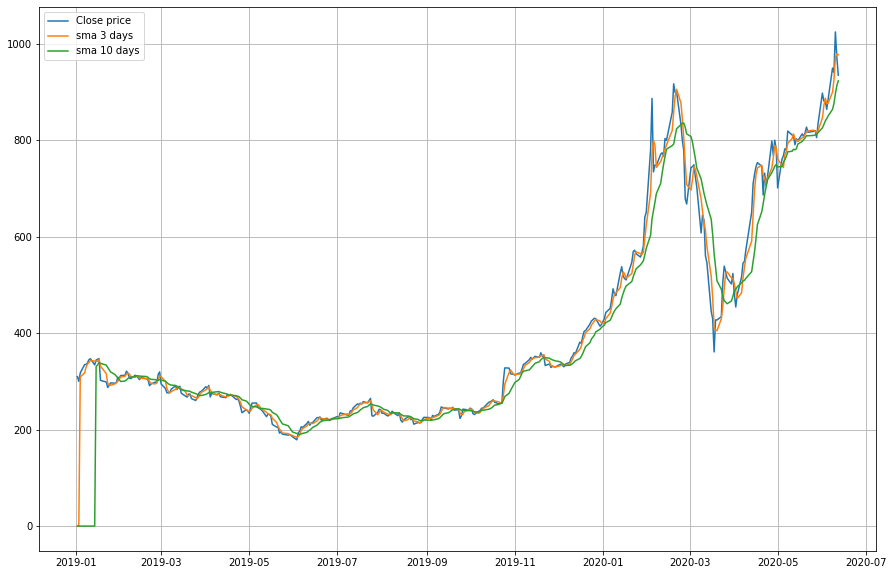

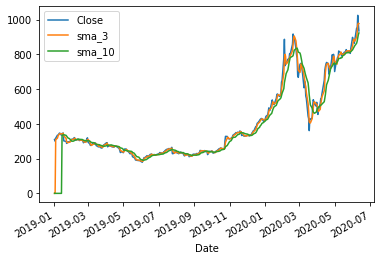

In [62]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(sma['Close'],label='Close price')
plt.plot(sma['sma_3'],label='sma 3 days')
plt.plot(sma['sma_10'],label='sma 10 days')
plt.legend(loc=2)

# or simply
sma[['Close', 'sma_3', 'sma_10']].plot()
